In [ ]:
!unzip '/content/drive/MyDrive/MPS Data Science Final Year Project/gas+sensor+array+under+dynamic+gas+mixtures.zip'

Archive:  /content/drive/MyDrive/MPS Data Science Final Year Project/gas+sensor+array+under+dynamic+gas+mixtures.zip
  inflating: ethylene_CO.txt         
  inflating: ethylene_methane.txt    


**Considering only one text file ethylene_CO.txt**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

In [ ]:
ethelene_co_df = pd.read_csv("/content/ethylene_CO.txt", delim_whitespace=True,skiprows=[0], header=None)


In [ ]:
ethelene_co_df = ethelene_co_df.rename(columns = {0:'Time', 1:'CO2 conc (ppm)', 2:'Ethylene conc (ppm)', 3:'Sensor1',4:'Sensor2',5:'Sensor3',6:'Sensor4',7:'Sensor5',8:'Sensor6',9:'Sensor7',10:'Sensor8',11:'Sensor9',12:'Sensor10',13:'Sensor11',14:'Sensor12',15:'Sensor13',16:'Sensor14',17:'Sensor15',18:'Sensor16'})


In [ ]:
ethelene_co_df.head()

Time  CO2 conc (ppm)  Ethylene conc (ppm)  Sensor1  Sensor2  Sensor3  \
0  0.00             0.0                  0.0   -50.85    -1.95   -41.82   
1  0.01             0.0                  0.0   -49.40    -5.53   -42.78   
2  0.01             0.0                  0.0   -40.04   -16.09   -27.59   
3  0.03             0.0                  0.0   -47.14   -10.57   -32.28   
4  0.04             0.0                  0.0   -33.58   -20.79   -33.25   

   Sensor4  Sensor5  Sensor6  Sensor7  Sensor8   Sensor9  Sensor10  Sensor11  \
0     1.30    -4.07   -28.73   -13.49    -3.25  55139.95  50669.50   9626.26   
1     0.49     3.58   -34.55    -9.59     5.37  54395.77  50046.91   9433.20   
2     0.00    -7.16   -42.14   -12.52    -5.86  53960.02  49299.30   9324.40   
3     4.40   -11.22   -37.94    -7.16    -1.14  53047.71  48907.00   9170.64   
4     6.03     3.42   -34.22   -14.46     8.31  52700.28  48330.96   9073.64   

   Sensor12  Sensor13  Sensor14  Sensor15  Sensor16  
0   9762.62  24544.02  21420.68   7650.61   6928.42  
1   9591.21  24137.13  20930.33   7498.79   6800.66  
2   9449.81  23628.90  20504.94   7369.67   6697.47  
3   9305.58  23101.66  20101.42   7285.13   6578.52  
4   9163.47  22689.54  19694.07   7156.74   6468.32

In [ ]:
print('Volume of data for mixture of Ethylene and CO :',ethelene_co_df.shape)

Volume of data for mixture of Ethylene and CO : (4208261, 19)


**Checking if there are any null values or not**

In [ ]:
print('Mixture of Ethylene and CO')
print(ethelene_co_df.isnull().sum())

Mixture of Ethylene and CO
Time                   0
CO2 conc (ppm)         0
Ethylene conc (ppm)    0
Sensor1                0
Sensor2                0
Sensor3                0
Sensor4                0
Sensor5                0
Sensor6                0
Sensor7                0
Sensor8                0
Sensor9                0
Sensor10               0
Sensor11               0
Sensor12               0
Sensor13               0
Sensor14               0
Sensor15               0
Sensor16               0
dtype: int64


**Checking data types of Mixture of Ethylene and CO**

In [ ]:
ethelene_co_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4208261 entries, 0 to 4208260
Data columns (total 19 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Time                 float64
 1   CO2 conc (ppm)       float64
 2   Ethylene conc (ppm)  float64
 3   Sensor1              float64
 4   Sensor2              float64
 5   Sensor3              float64
 6   Sensor4              float64
 7   Sensor5              float64
 8   Sensor6              float64
 9   Sensor7              float64
 10  Sensor8              float64
 11  Sensor9              float64
 12  Sensor10             float64
 13  Sensor11             float64
 14  Sensor12             float64
 15  Sensor13             float64
 16  Sensor14             float64
 17  Sensor15             float64
 18  Sensor16             float64
dtypes: float64(19)
memory usage: 610.0 MB


**Value Counts of CO2 conc (ppm)**


In [ ]:
import matplotlib.pyplot as plt

def plot_value_counts(dataframe, column_name):
    # Calculate the value counts for the specified column
    value_counts = dataframe[column_name].value_counts()

    # Create a bar chart
    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar')
    plt.xlabel(column_name)
    plt.ylabel('Count(mil)')
    plt.title(f'Value Counts of {column_name}')
    plt.show()

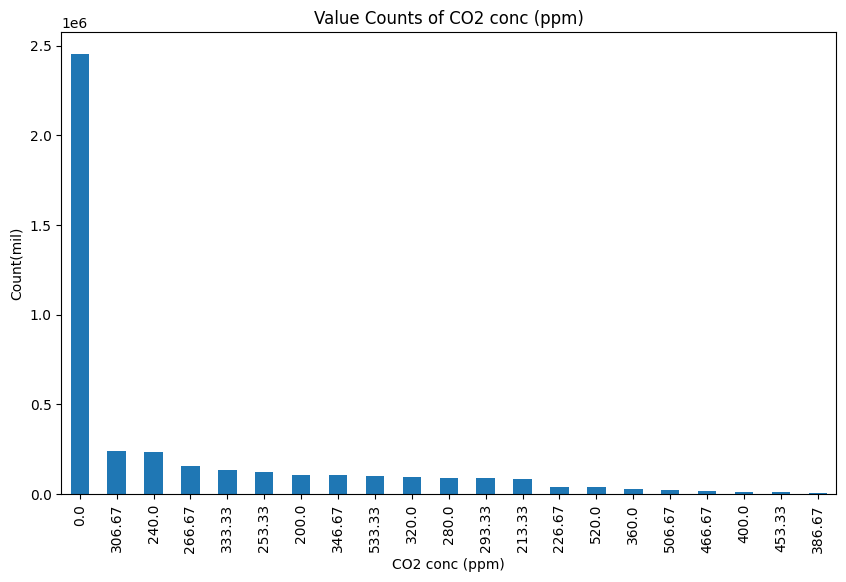

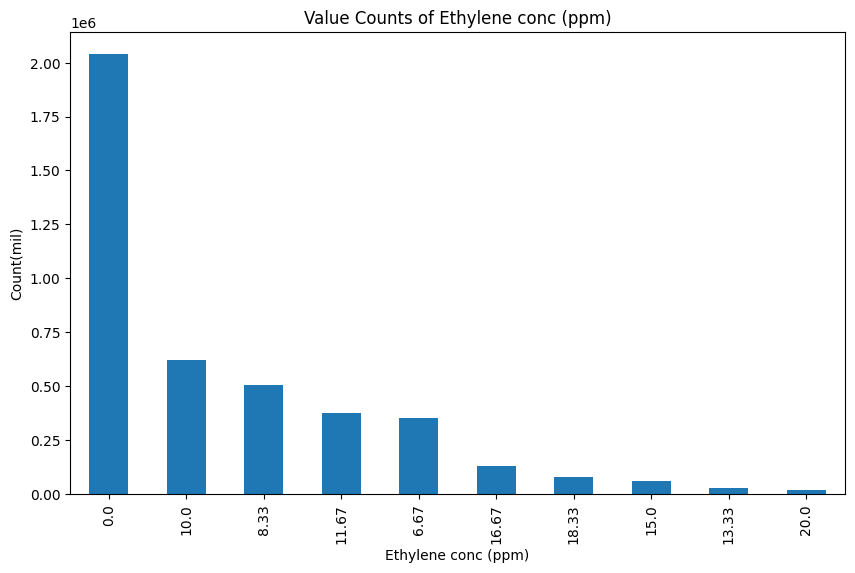

In [ ]:
plot_value_counts(ethelene_co_df, 'CO2 conc (ppm)')

plot_value_counts(ethelene_co_df, 'Ethylene conc (ppm)')

**Distribution of the Sensors data**

In [ ]:
def plot_sensor_data(dataframe, width=20, height=6):
    # Extract the time values and sensor values
    time = dataframe['Time']
    sensor_columns = ['Sensor{}'.format(i) for i in range(1, 17)]
    sensor_values = dataframe[sensor_columns]

    # Define a list of distinct colors
    colors = plt.cm.get_cmap('tab20', len(sensor_columns))

    # Create a figure and axis with custom width and height
    plt.figure(figsize=(width, height))
    ax = plt.gca()

    # Plot each sensor with a different color
    for i, sensor_column in enumerate(sensor_columns):
        ax.plot(time, dataframe[sensor_column], label=sensor_column, color=colors(i))

    # Add labels and legend
    plt.xlabel('Time (seconds)')
    plt.ylabel('Sensor Values')
    plt.title('Sensor Data Over Time')
    plt.legend(loc='upper right')

<ipython-input-14-56ded9ce51c4>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(sensor_columns))


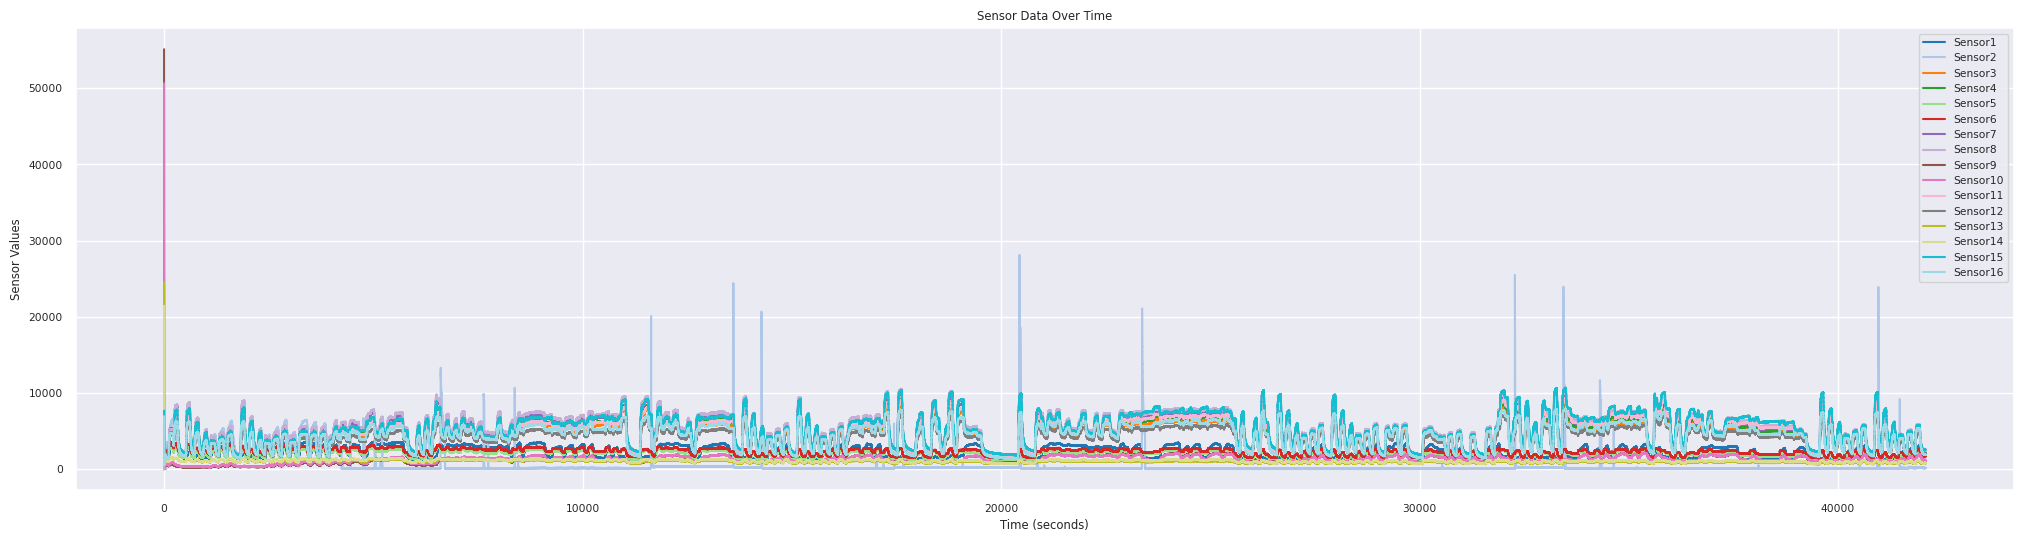

In [ ]:
plot_sensor_data(ethelene_co_df, width=25, height=6)
plt.show()

**Outliers/Anomalies in Data**

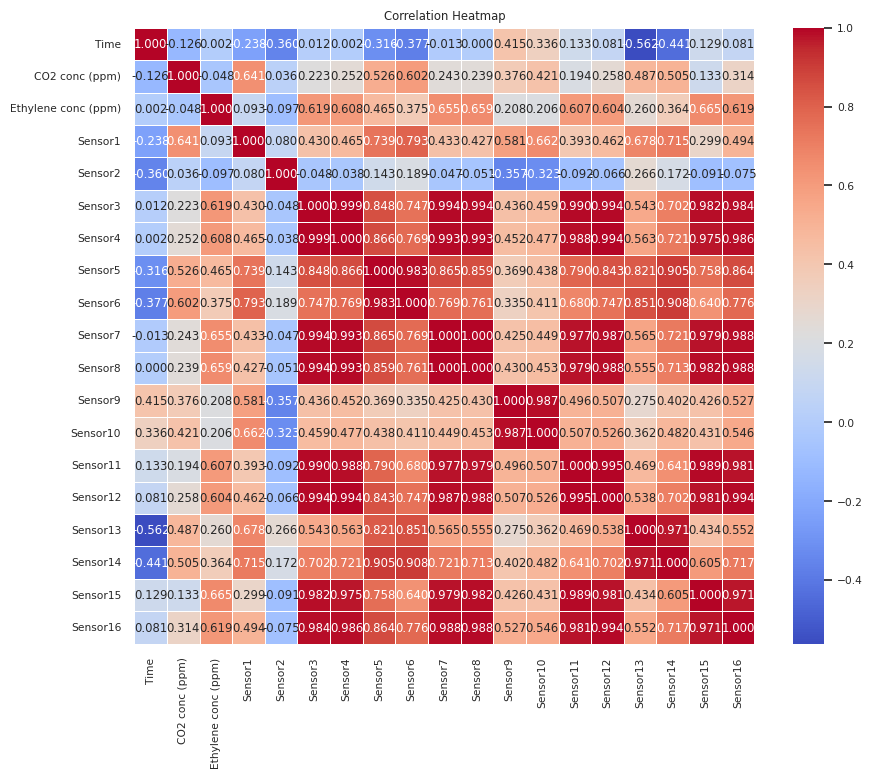

In [ ]:
import seaborn as sns
correlation_matrix = ethelene_co_df.corr()

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.set(font_scale=0.7)  # Adjust the font size if necessary

# Create the heatmap with annotated values
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".3f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
sensor_columns = ethelene_co_df.columns[3:]
# Define a threshold for flagging anomalies (e.g., 2 standard deviations from the mean)
threshold = 3
# Create a DataFrame to store detected anomalies
anomalies = pd.DataFrame(sensor_columns)
# Loop through each sensor and detect anomalies
for sensor_column in sensor_columns:
    z_scores = (ethelene_co_df[sensor_column] - ethelene_co_df[sensor_column].mean()) / ethelene_co_df[sensor_column].std()
    sensor_anomalies = ethelene_co_df[sensor_column][abs(z_scores) > threshold]
    anomalies[sensor_column] = sensor_anomalies
print("Detected Anomalies using Z-Scores:")
print(anomalies)

Detected Anomalies using Z-Scores:
           0  Sensor1  Sensor2  Sensor3  Sensor4  Sensor5  Sensor6  Sensor7  \
0    Sensor1      NaN      NaN      NaN      NaN    -4.07   -28.73      NaN   
1    Sensor2      NaN      NaN      NaN      NaN     3.58   -34.55      NaN   
2    Sensor3      NaN      NaN      NaN      NaN    -7.16   -42.14      NaN   
3    Sensor4      NaN      NaN      NaN      NaN   -11.22   -37.94      NaN   
4    Sensor5      NaN      NaN      NaN      NaN     3.42   -34.22      NaN   
5    Sensor6      NaN      NaN      NaN      NaN     0.33   -29.05      NaN   
6    Sensor7      NaN      NaN      NaN      NaN    -7.97   -30.34      NaN   
7    Sensor8      NaN      NaN      NaN      NaN    -2.28   -24.35      NaN   
8    Sensor9      NaN      NaN      NaN      NaN    -2.12   -27.59      NaN   
9   Sensor10      NaN      NaN      NaN      NaN    -0.65   -35.52      NaN   
10  Sensor11      NaN      NaN      NaN      NaN     4.56   -27.92      NaN   
11  Sensor12     

In [ ]:
def plot_sensor_scatter(df, sensor_name):

    if sensor_name not in df.columns:
        print(f"'{sensor_name}' not found in the DataFrame.")
        return

    # Extracting the 'Time (seconds)' and sensor data
    time_data = df['Time']
    sensor_data = df[sensor_name]

    # Creating a scatter plot
    plt.figure(figsize=(12, 6))  # figure size as needed
    plt.scatter(time_data, sensor_data, marker='o', s=20, c='blue', label=f'{sensor_name}')
    plt.title(f'Scatter Plot of Time vs. {sensor_name}')
    plt.xlabel('Time')
    plt.ylabel(f'{sensor_name} Value')
    plt.grid(True)
    plt.legend()

    # Showing the plot
    plt.tight_layout()
    plt.show()


**Plotting distribution of each sensor individually**

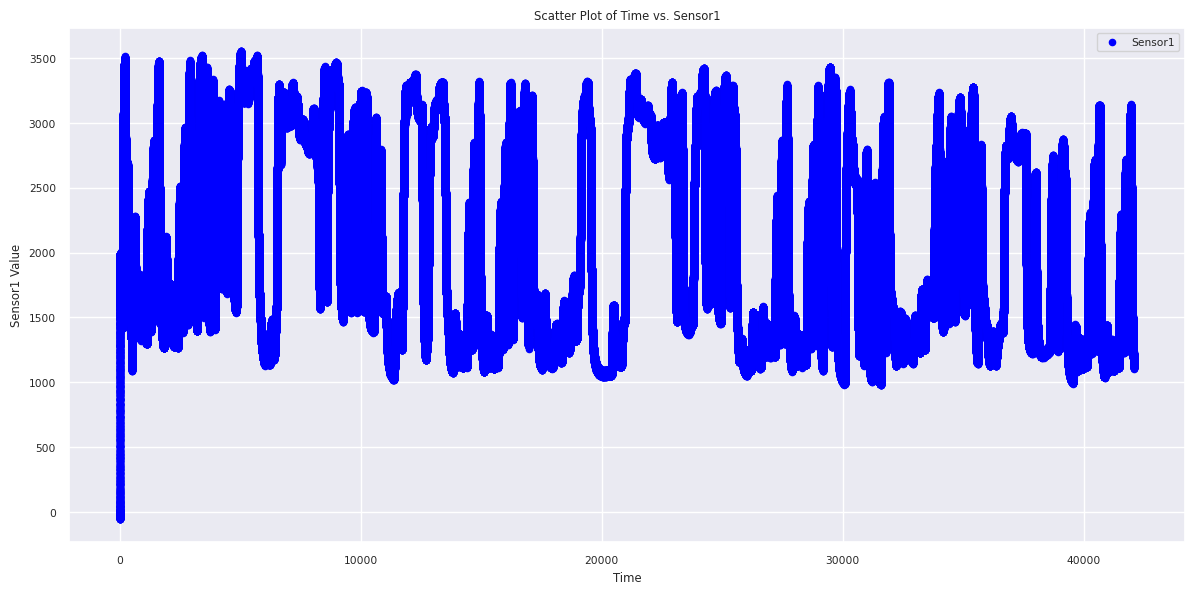

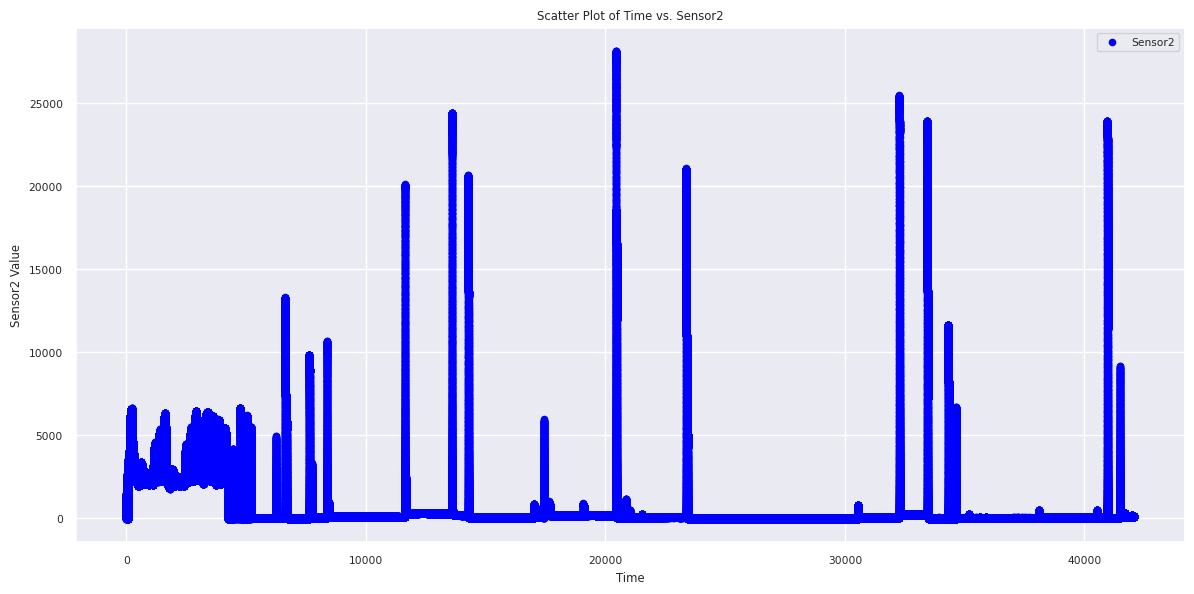

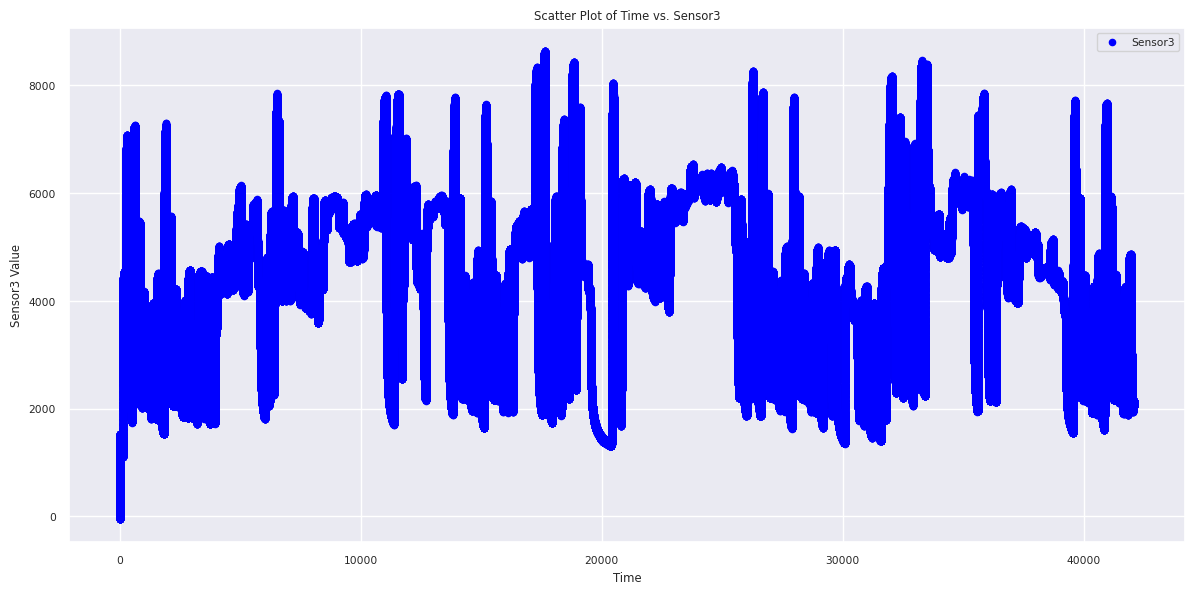

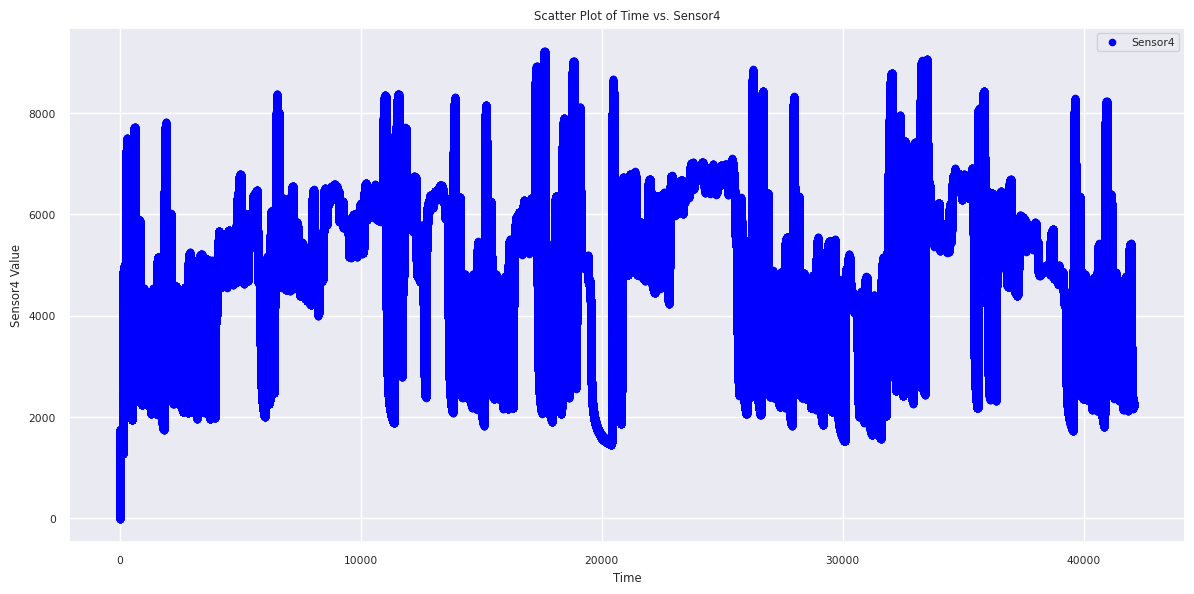

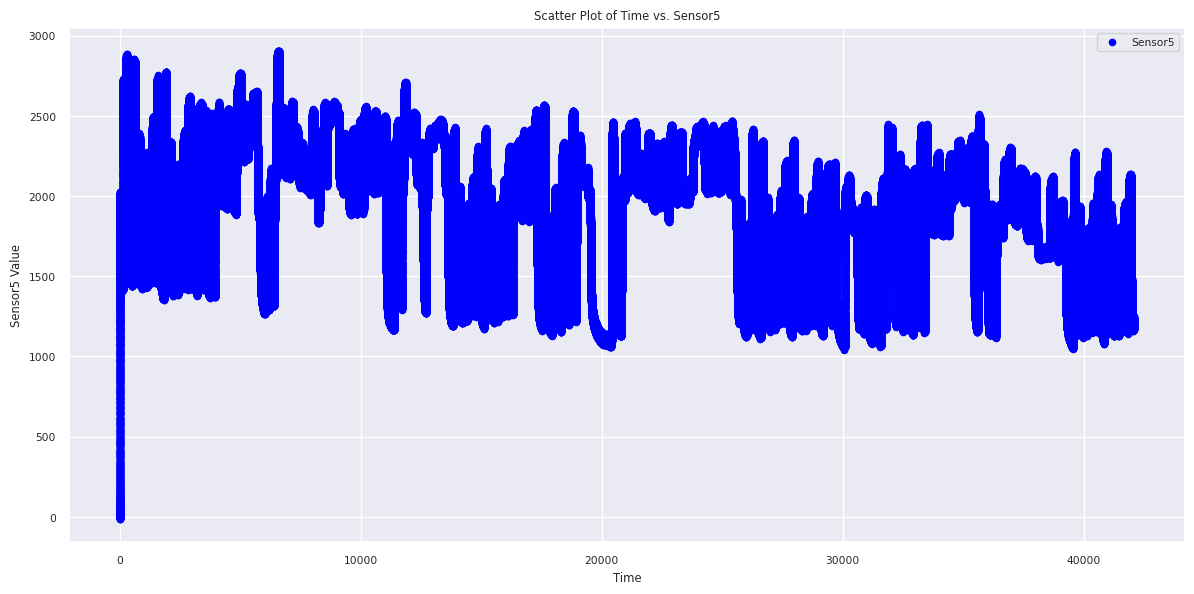

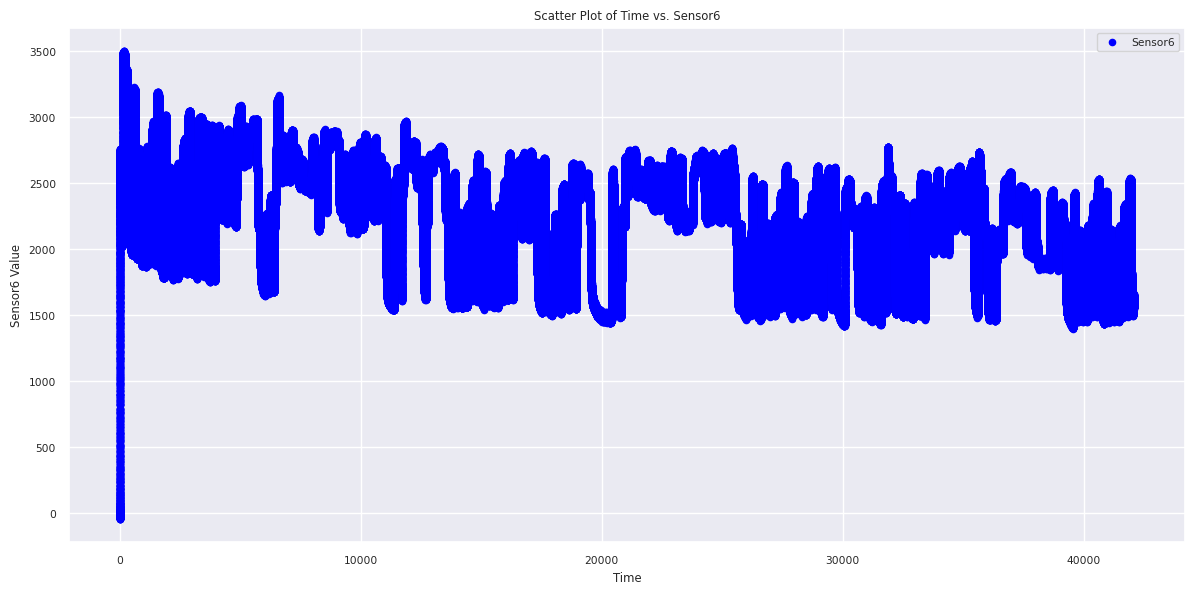

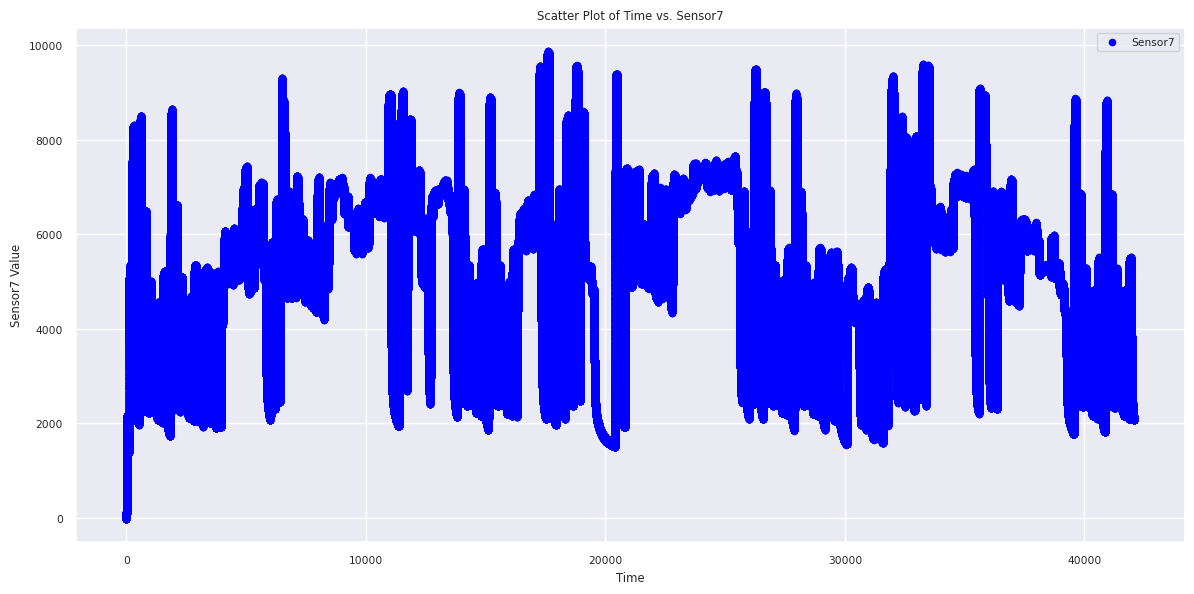

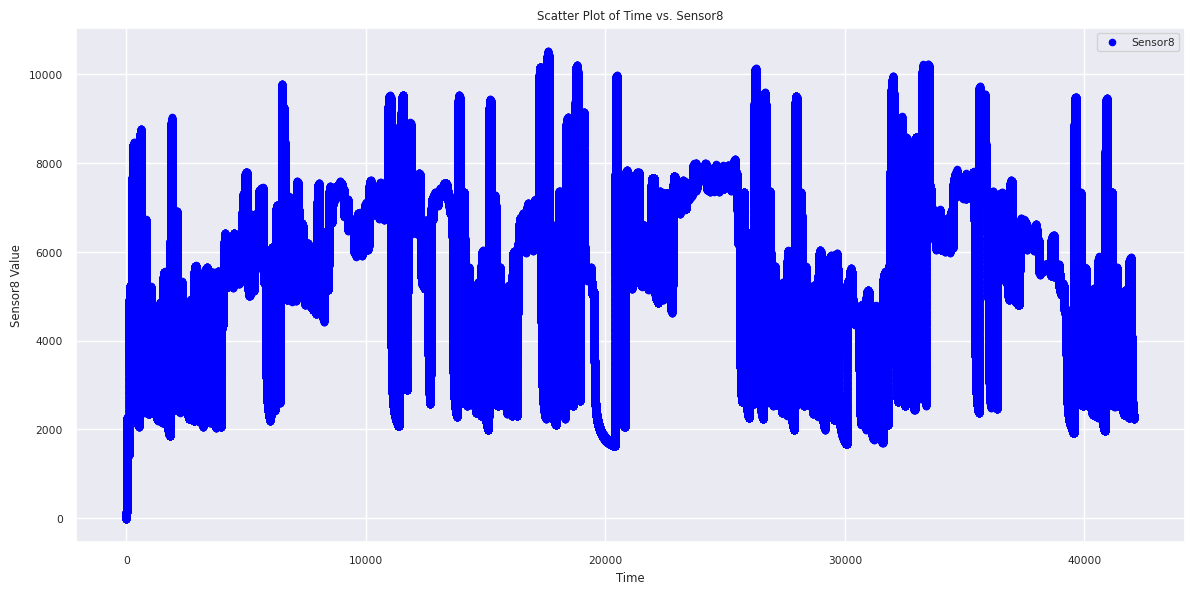

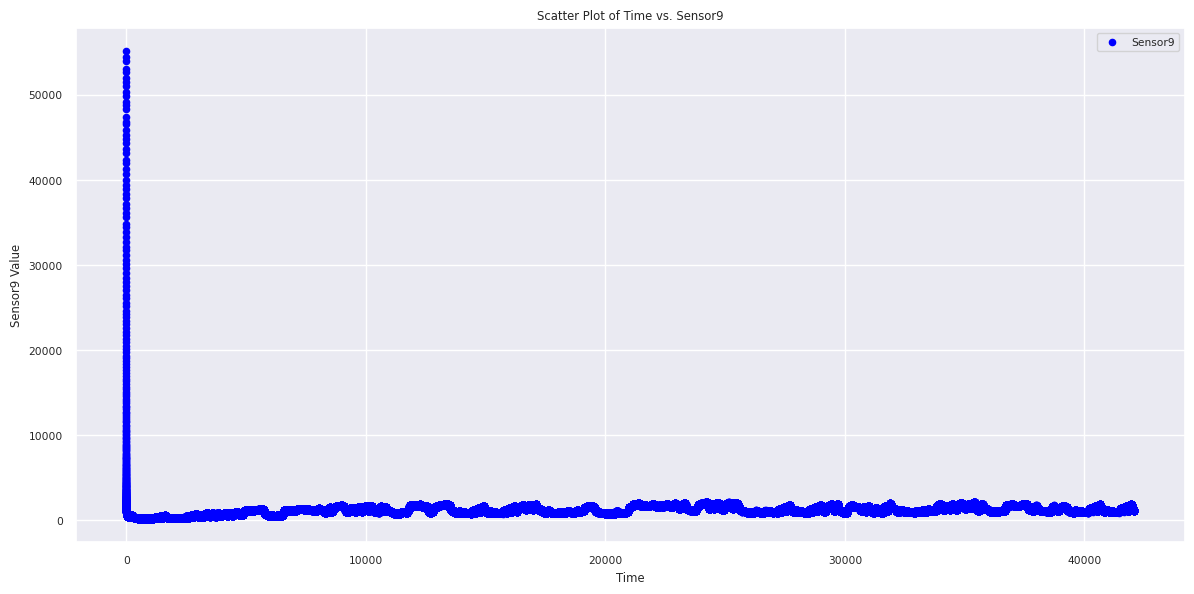

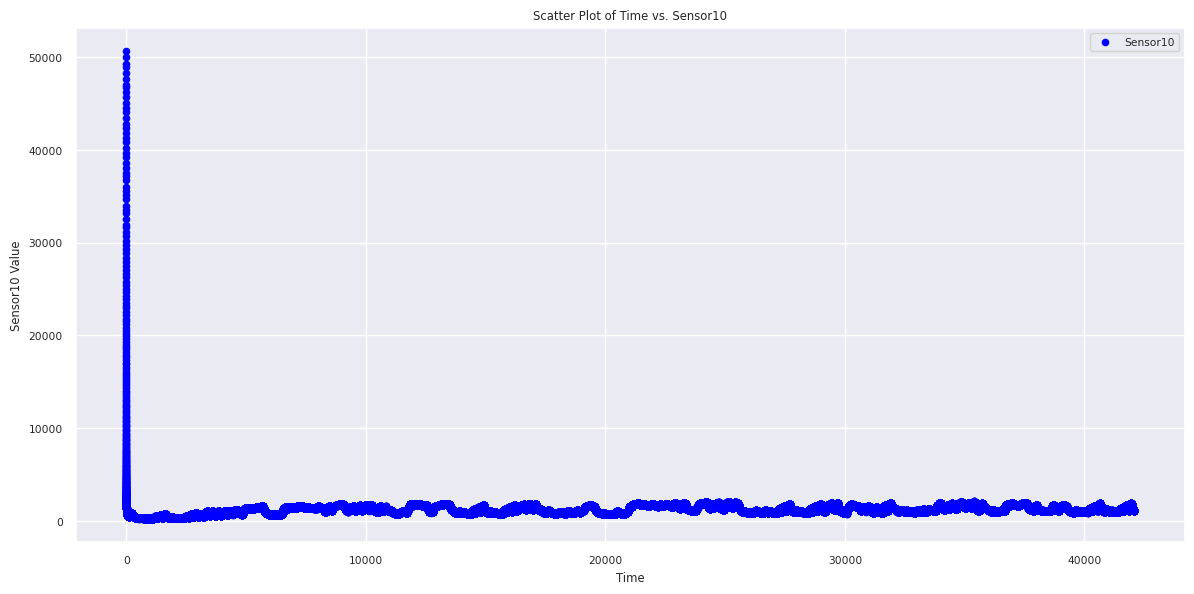

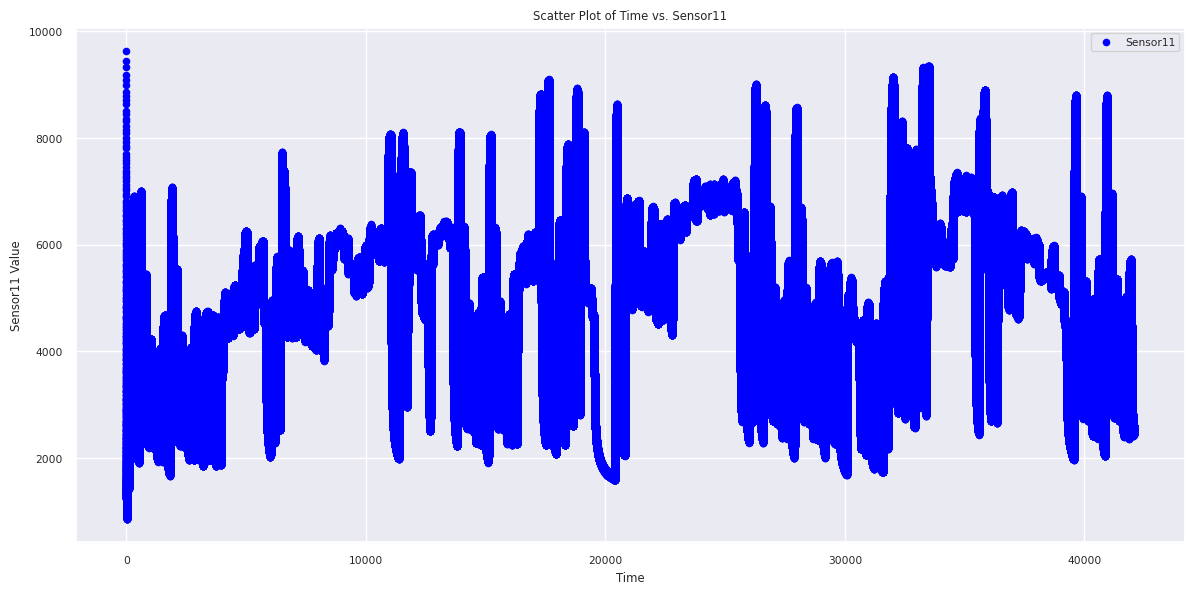

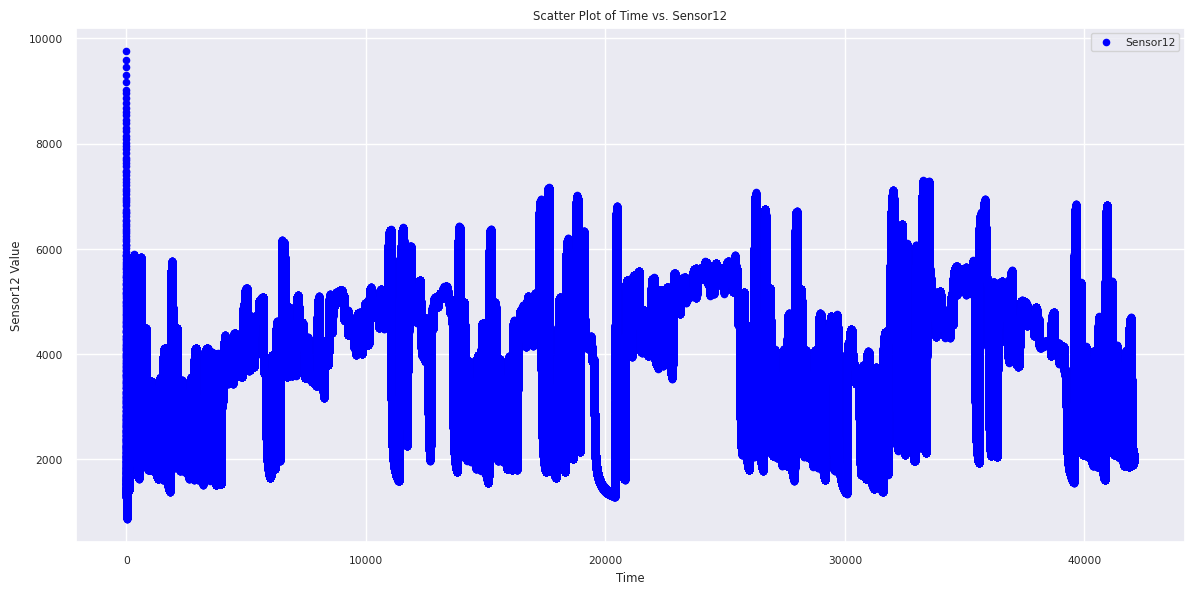

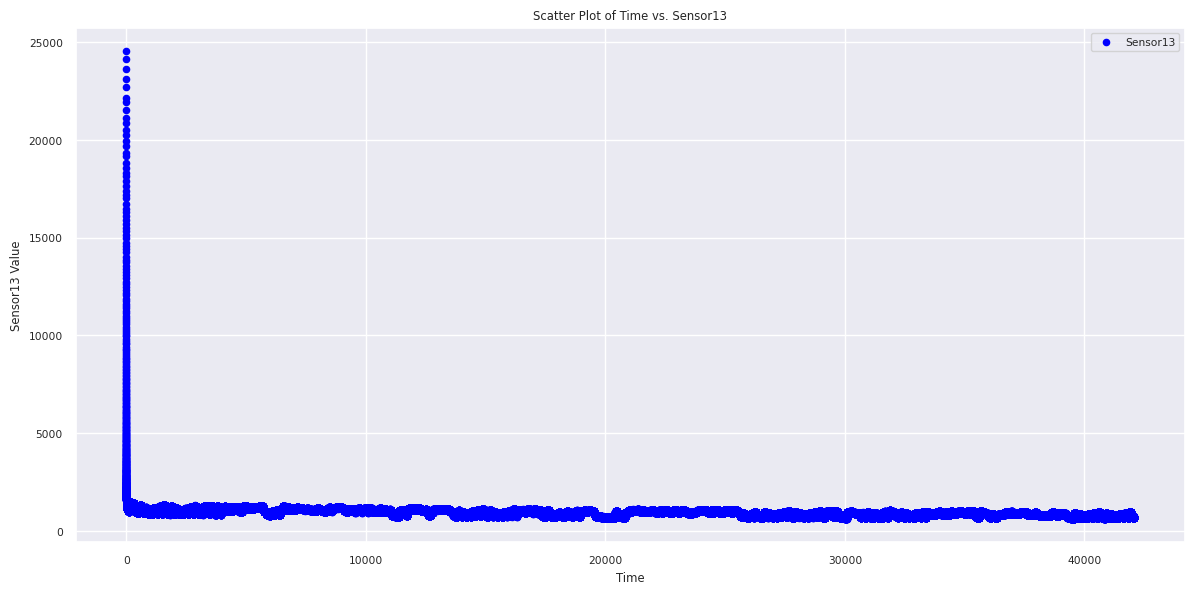

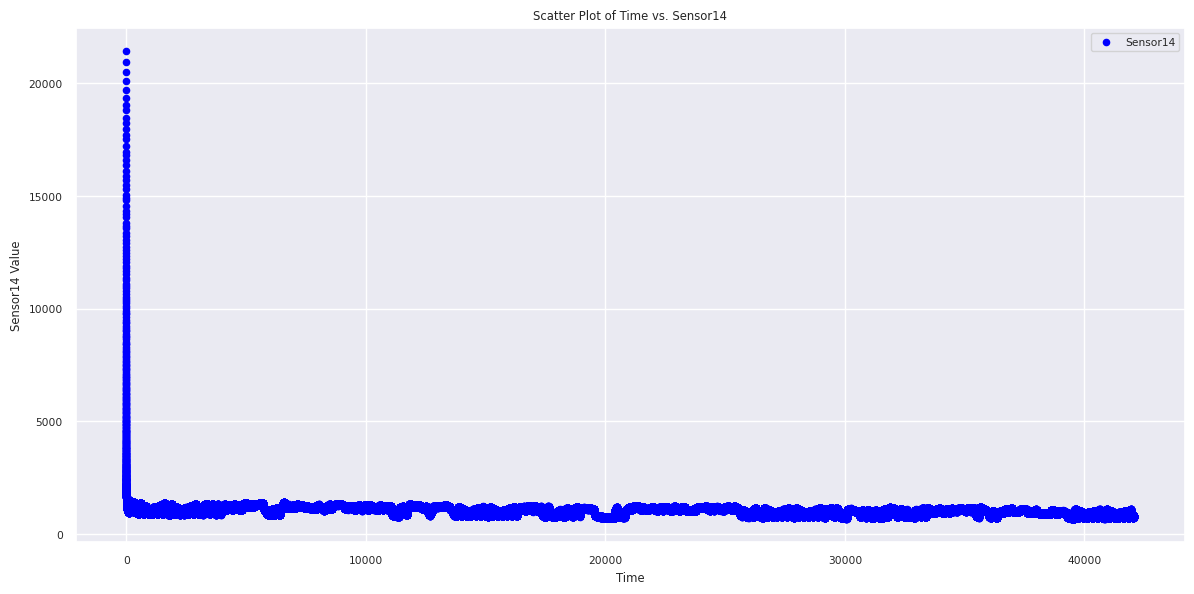

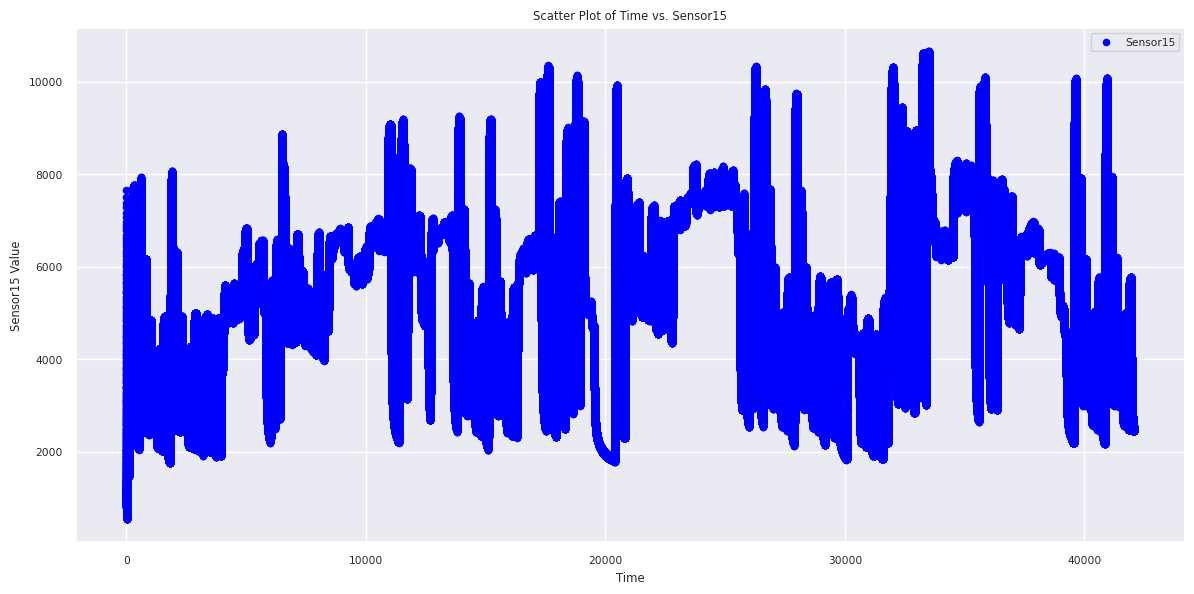

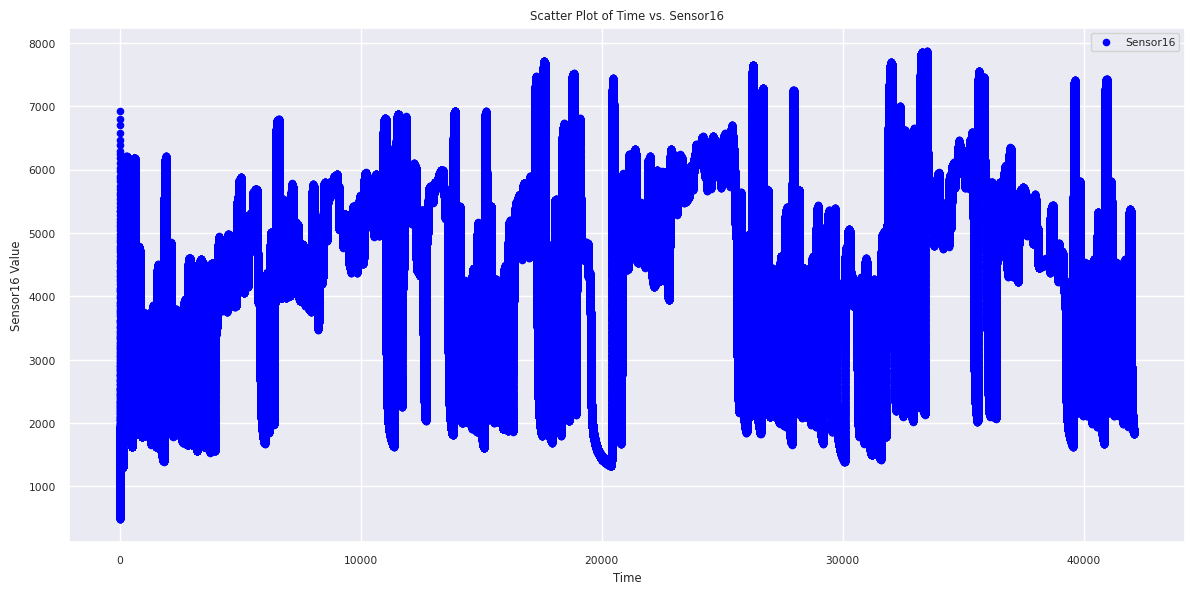

In [ ]:
sensor_names = ['Sensor1', 'Sensor2', 'Sensor3', 'Sensor4', 'Sensor5', 'Sensor6',
                'Sensor7', 'Sensor8', 'Sensor9', 'Sensor10', 'Sensor11', 'Sensor12',
                'Sensor13', 'Sensor14', 'Sensor15', 'Sensor16']
# Loop through all sensors and create scatter plots
for sensor_name in sensor_names:
    plot_sensor_scatter(ethelene_co_df, sensor_name)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def detect_and_visualize_anomalies(df, sensor_name, threshold=1.5, plot_interpolated=False):
    if sensor_name not in df.columns:
        print(f"'{sensor_name}' not found in the DataFrame.")
        return
    # Extract the sensor data
    sensor_data = df[sensor_name]
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = np.percentile(sensor_data, 25)
    Q3 = np.percentile(sensor_data, 75)
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    # Define upper and lower bounds for anomalies
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    # Identify anomalies
    anomalies = df[(sensor_data < lower_bound) | (sensor_data > upper_bound)]
    # Plot the sensor data
    plt.figure(figsize=(12, 6))
    plt.plot(df['Time'], sensor_data, label=f'{sensor_name} Data', marker='o', markersize=5)
    # Highlight anomalies
    if len(anomalies) > 0:
        plt.scatter(anomalies['Time'], anomalies[sensor_name], color='red', label='Anomalies', marker='x', s=50)
    # Interpolate and plot
    if plot_interpolated:
        interpolated_data = df.interpolate()
        plt.plot(interpolated_data['Time'], interpolated_data[sensor_name], linestyle='--', color='gray', label='Interpolated')
    # Customize the plot
    plt.title(f'Sensor Data and Anomalies for {sensor_name}')
    plt.xlabel('Time (seconds)')
    plt.ylabel(f'{sensor_name} Value')
    plt.legend()
    plt.grid(True)
    # Show the plot
    plt.tight_layout()
    plt.show()

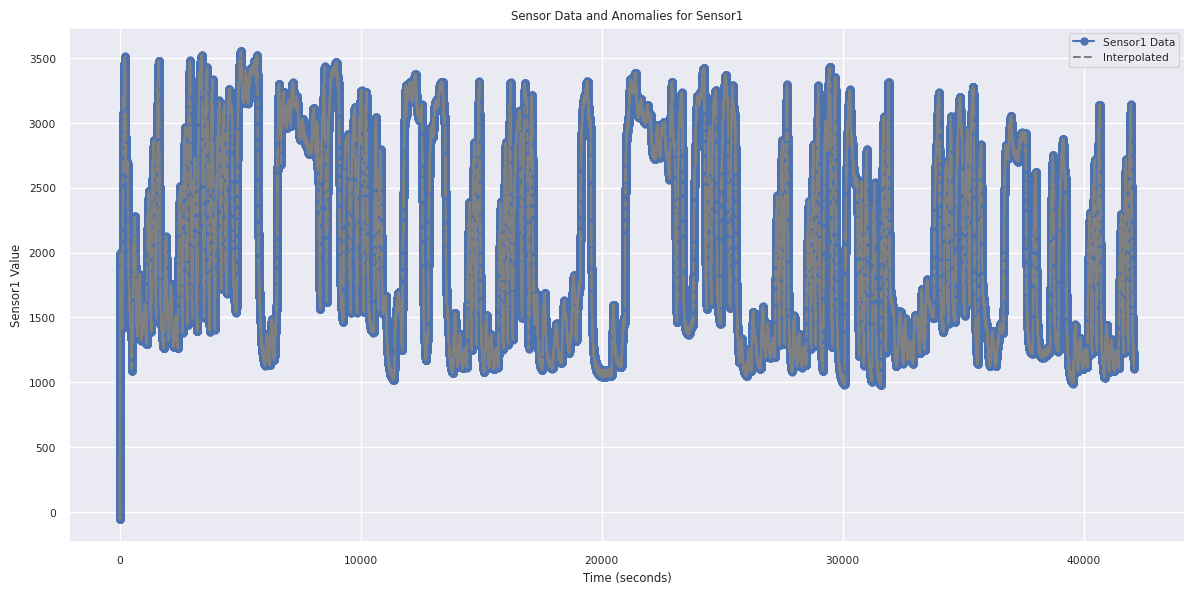

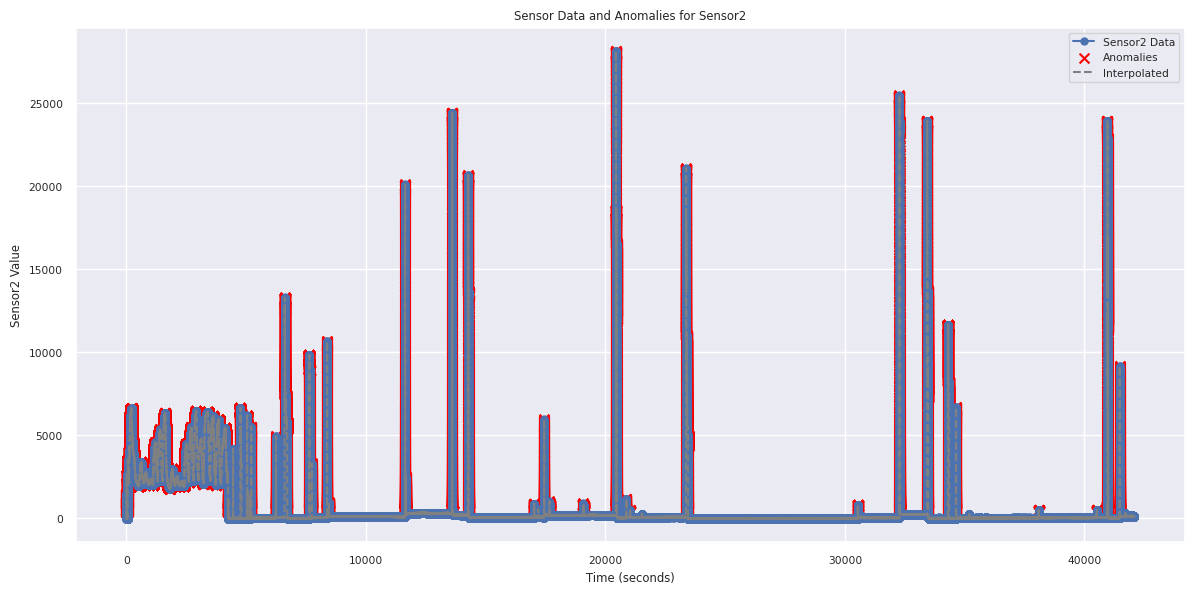

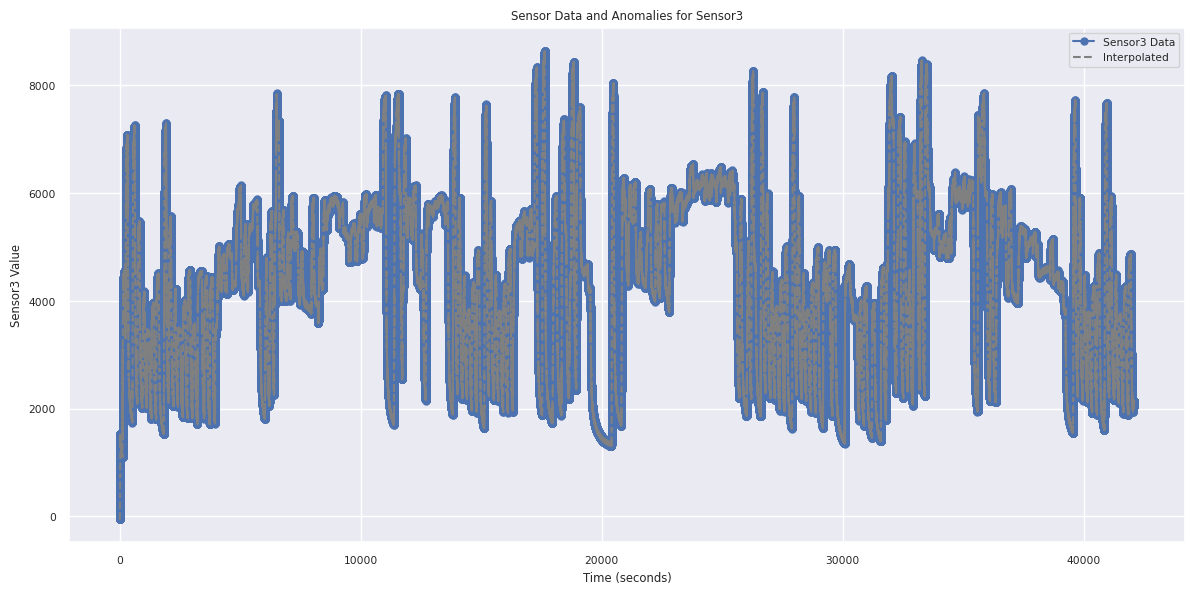

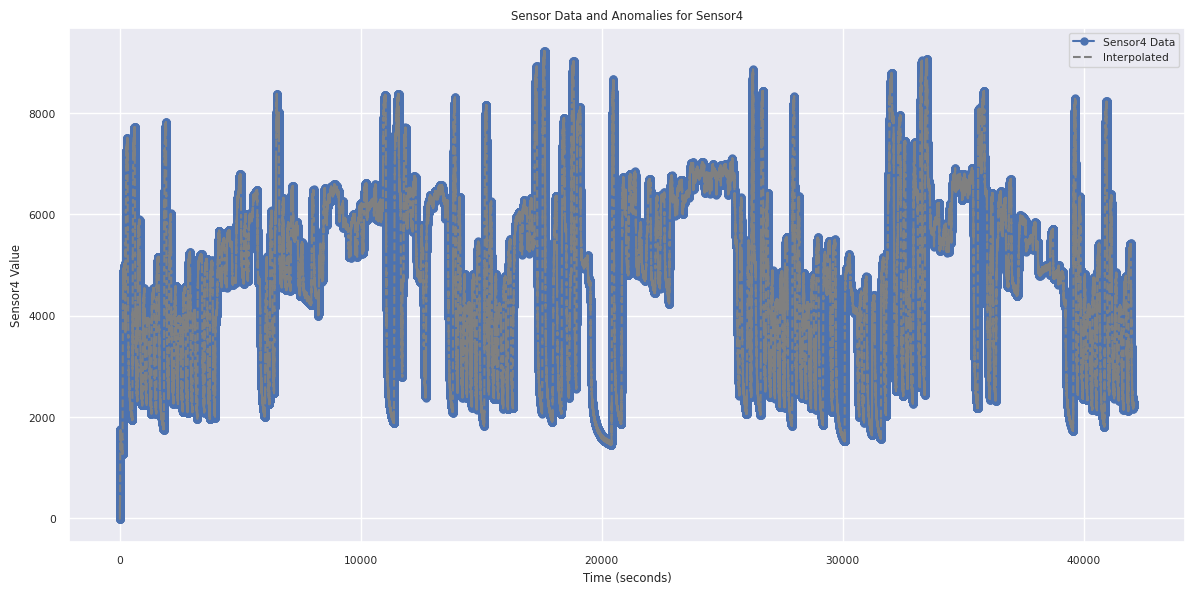

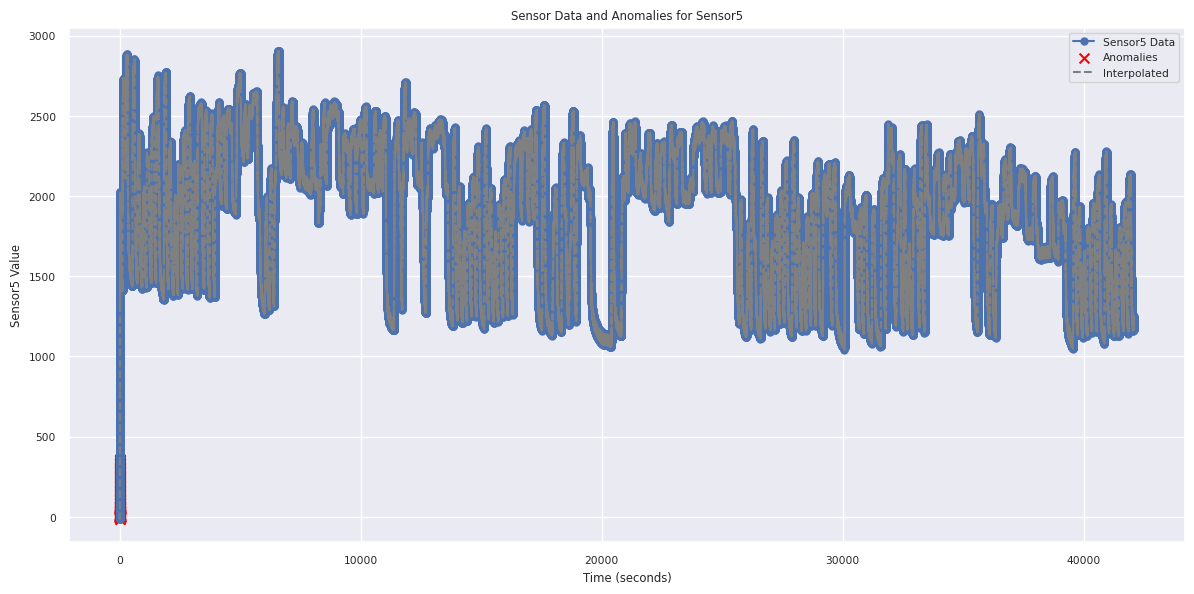

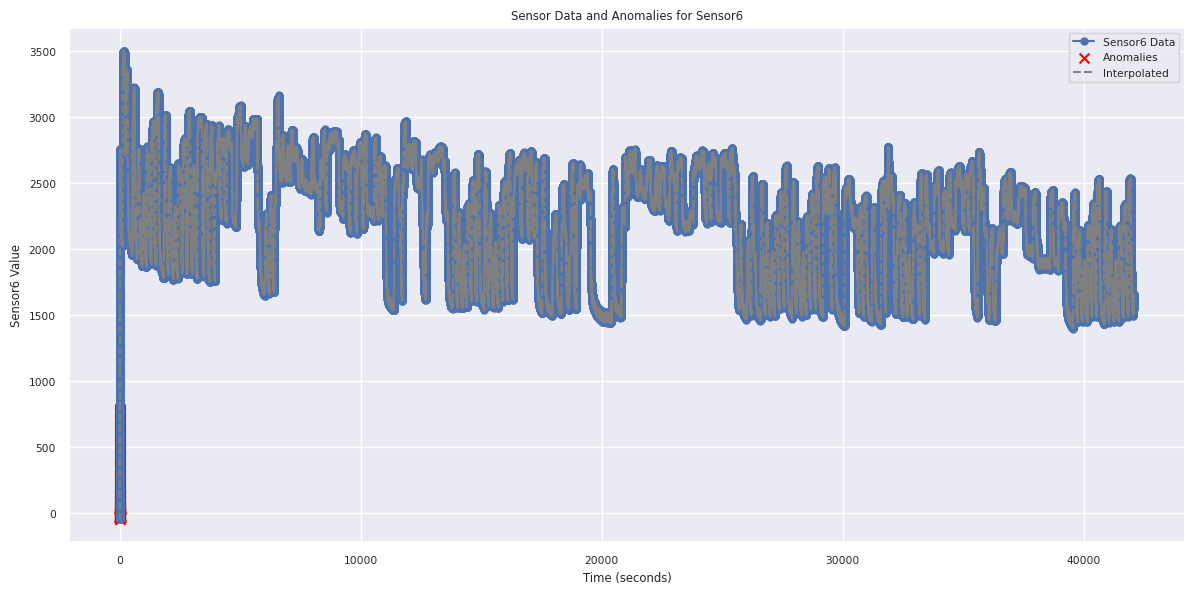

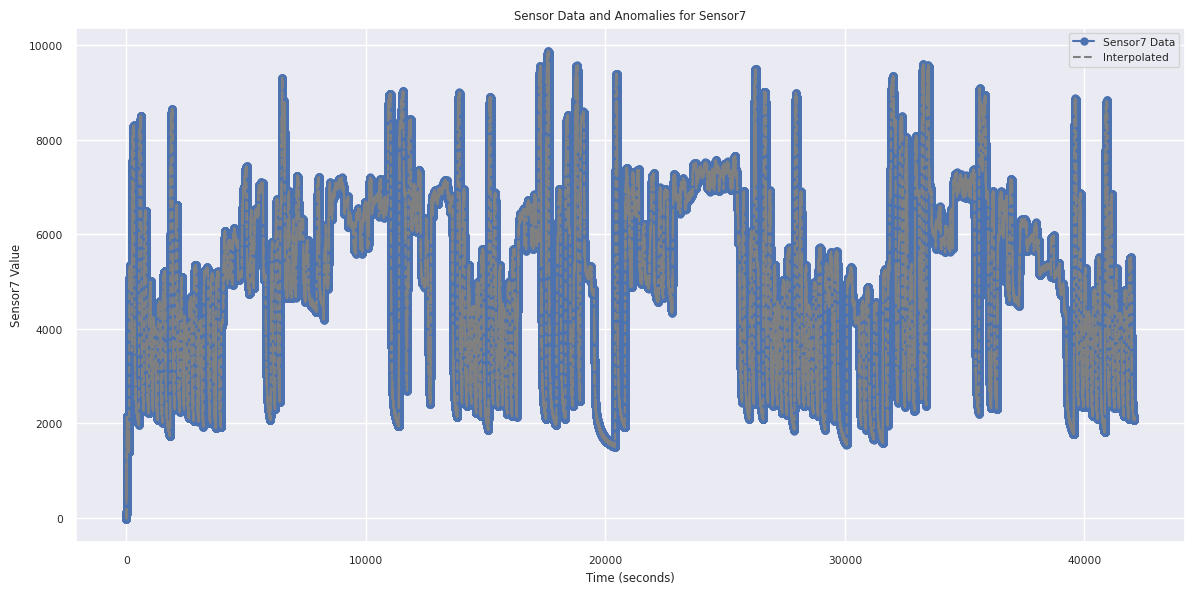

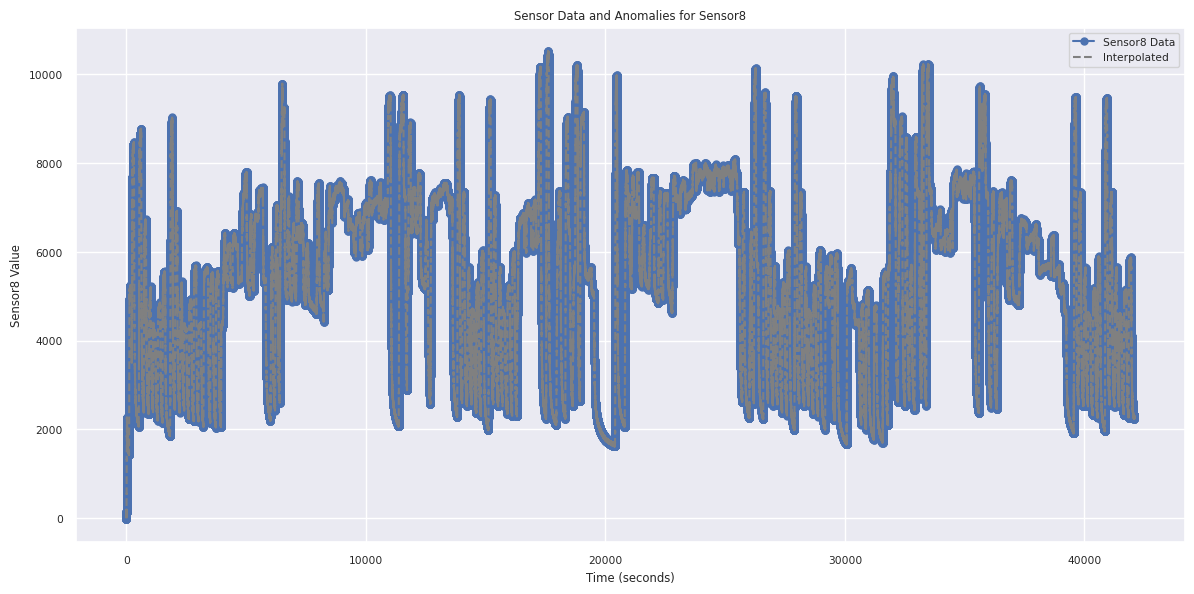

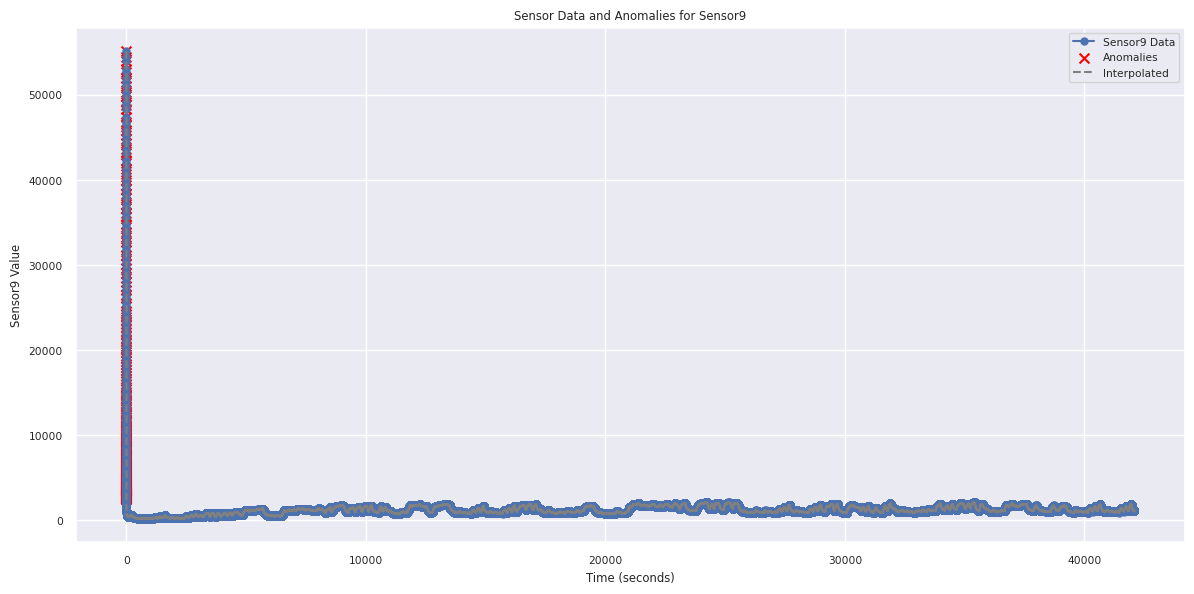

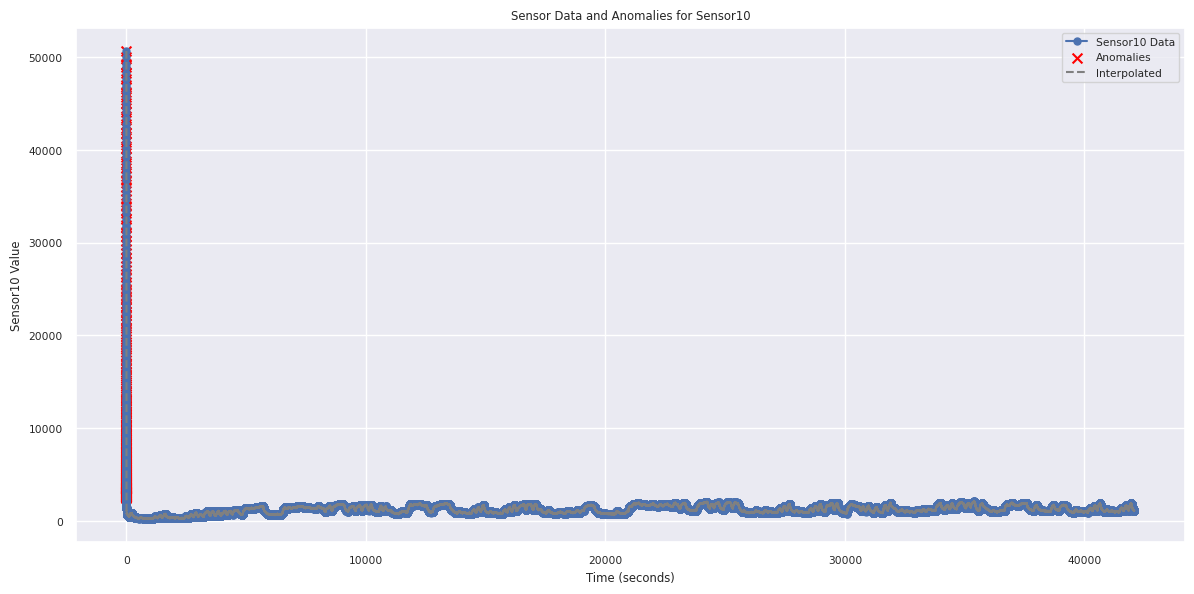

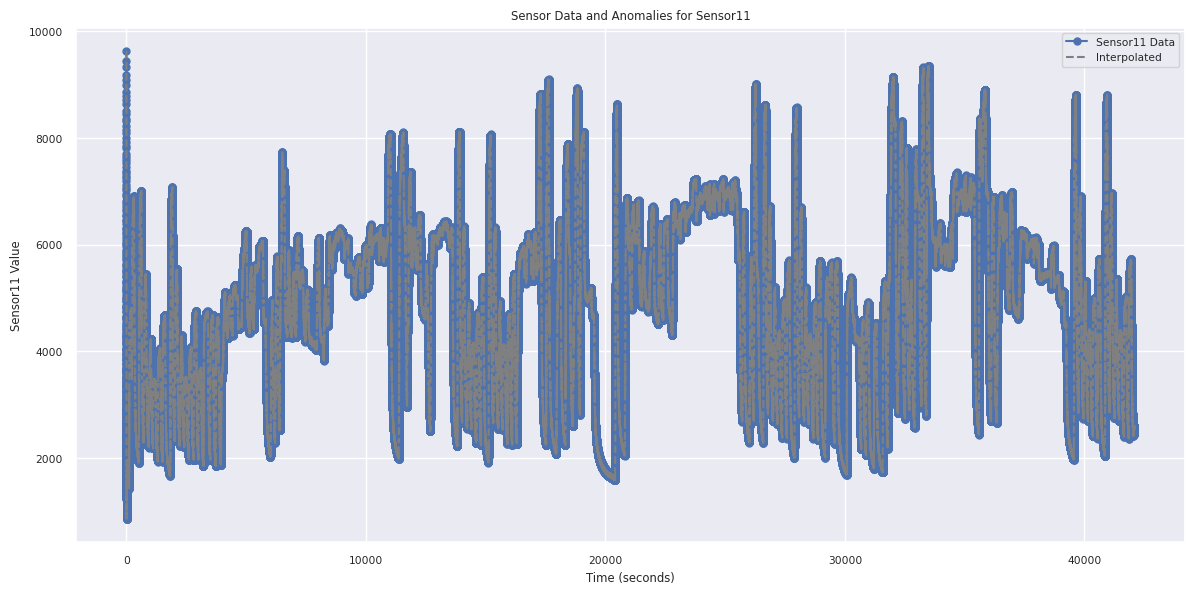

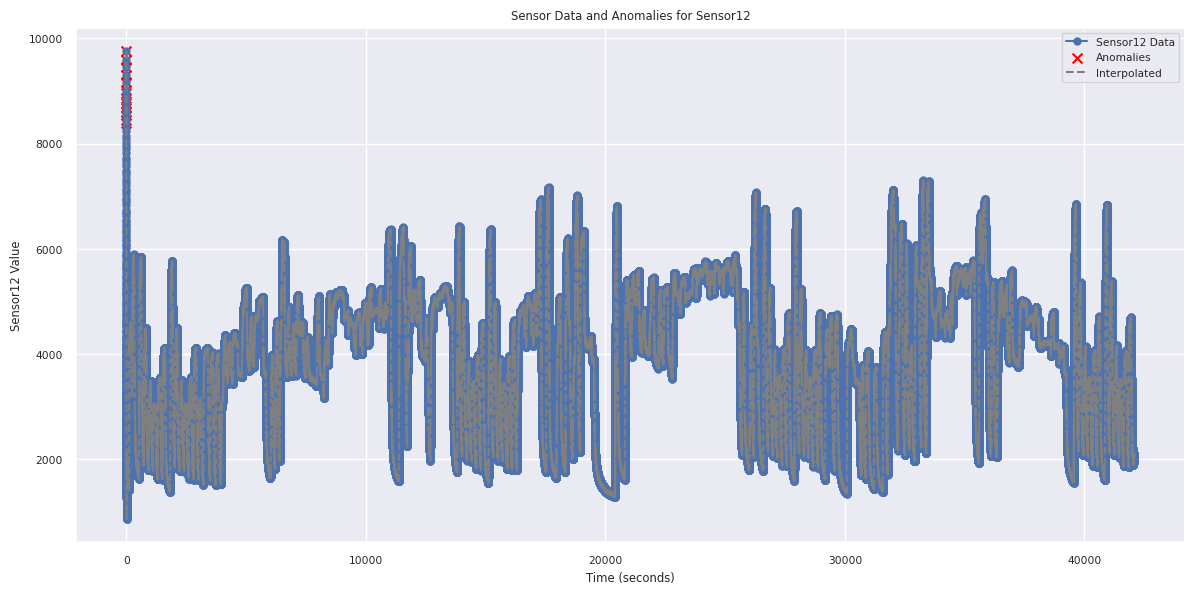

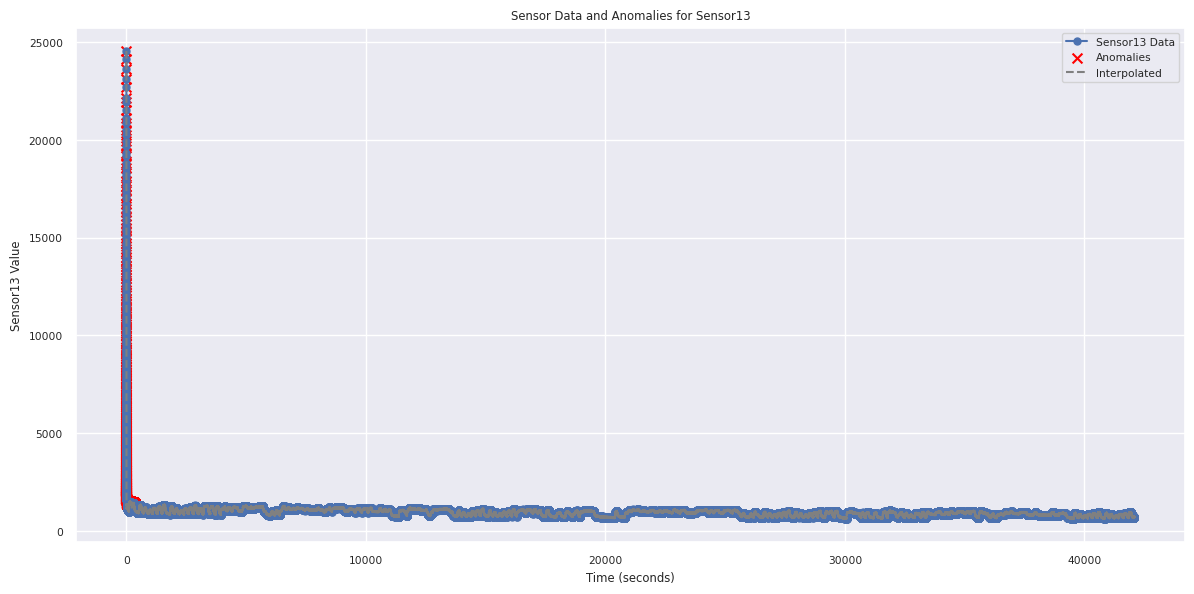

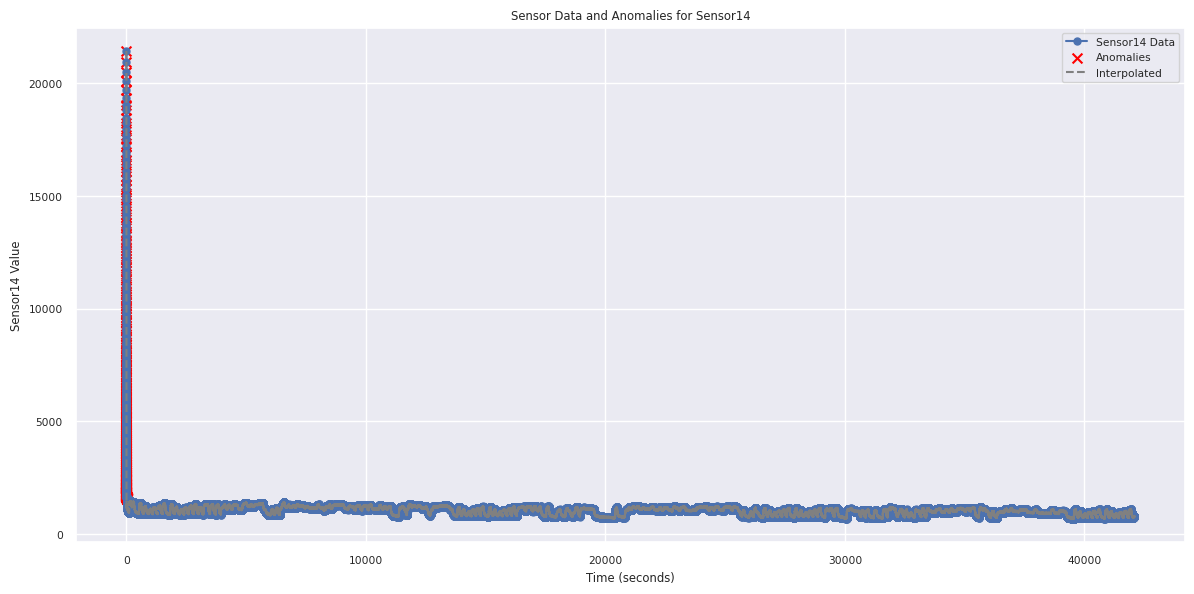

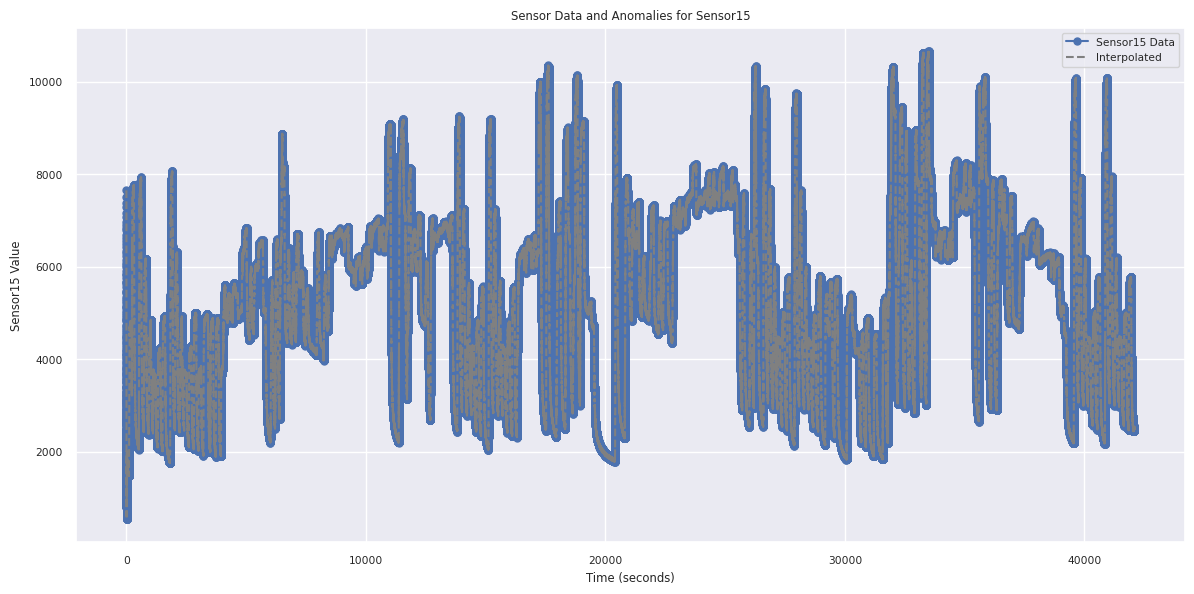

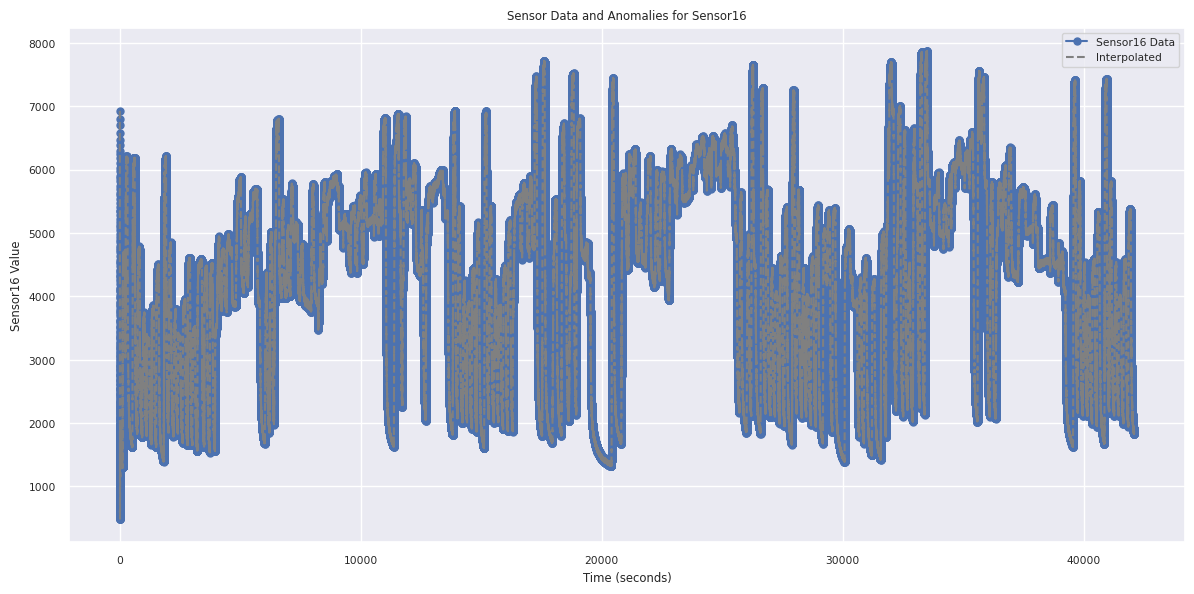

In [ ]:
# List of sensor names (replace with your actual sensor column names)
sensor_names = ['Sensor1', 'Sensor2', 'Sensor3', 'Sensor4', 'Sensor5', 'Sensor6',
                'Sensor7', 'Sensor8', 'Sensor9', 'Sensor10', 'Sensor11', 'Sensor12',
                'Sensor13', 'Sensor14', 'Sensor15', 'Sensor16']
# Loop through all sensors and create anomaly plots
for sensor_name in sensor_names:
    detect_and_visualize_anomalies(ethelene_co_df, sensor_name, threshold=1.5, plot_interpolated=True)
